In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\venus2'

In [5]:
data_dir='F:\Datasets'

In [9]:
os.chdir(data_dir)

In [36]:
data=pd.read_csv("pollution_india_2010.csv",na_values='Null')

In [37]:
data.dtypes

City      object
NO2      float64
PM10     float64
SO2      float64
State     object
dtype: object

In [39]:
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(sum)

In [31]:
data_pol.head


<bound method NDFrame.head of                      State                                     NO2  \
0           Andhra Pradesh                 91124119231223129141016   
1                    Assam                151414151515141614161316   
2                    Bihar                                      40   
3               Chandigarh                                      16   
4              Chattisgarh                                22192143   
5   Dadra and Nagar Haveli                                      18   
6            Daman and Diu                                      18   
7                    Delhi                                      55   
8                      Goa                    17181917275018162510   
9                  Gujarat                          21242717242924   
10                 Haryana                                   29826   
11         HimachalPradesh                          16111818121713   
12       Jammu and Kashmir                                  

In [41]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [44]:
data.shape

(181, 5)

In [47]:
def scale(x):
    return(x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
data_scaled=data_num.apply(scale,axis=0)

In [50]:
data_num.head(5)

,NO2,PM10,SO2
0,183.0,893.0,60.0
1,177.0,834.0,74.0
2,40.0,181.0,7.0
3,16.0,92.0,2.0
4,105.0,502.0,45.0


In [53]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [55]:
data_scaled=np.array(data_scaled)

In [58]:
Z=linkage(data_scaled,method="ward")  #single #complete #average

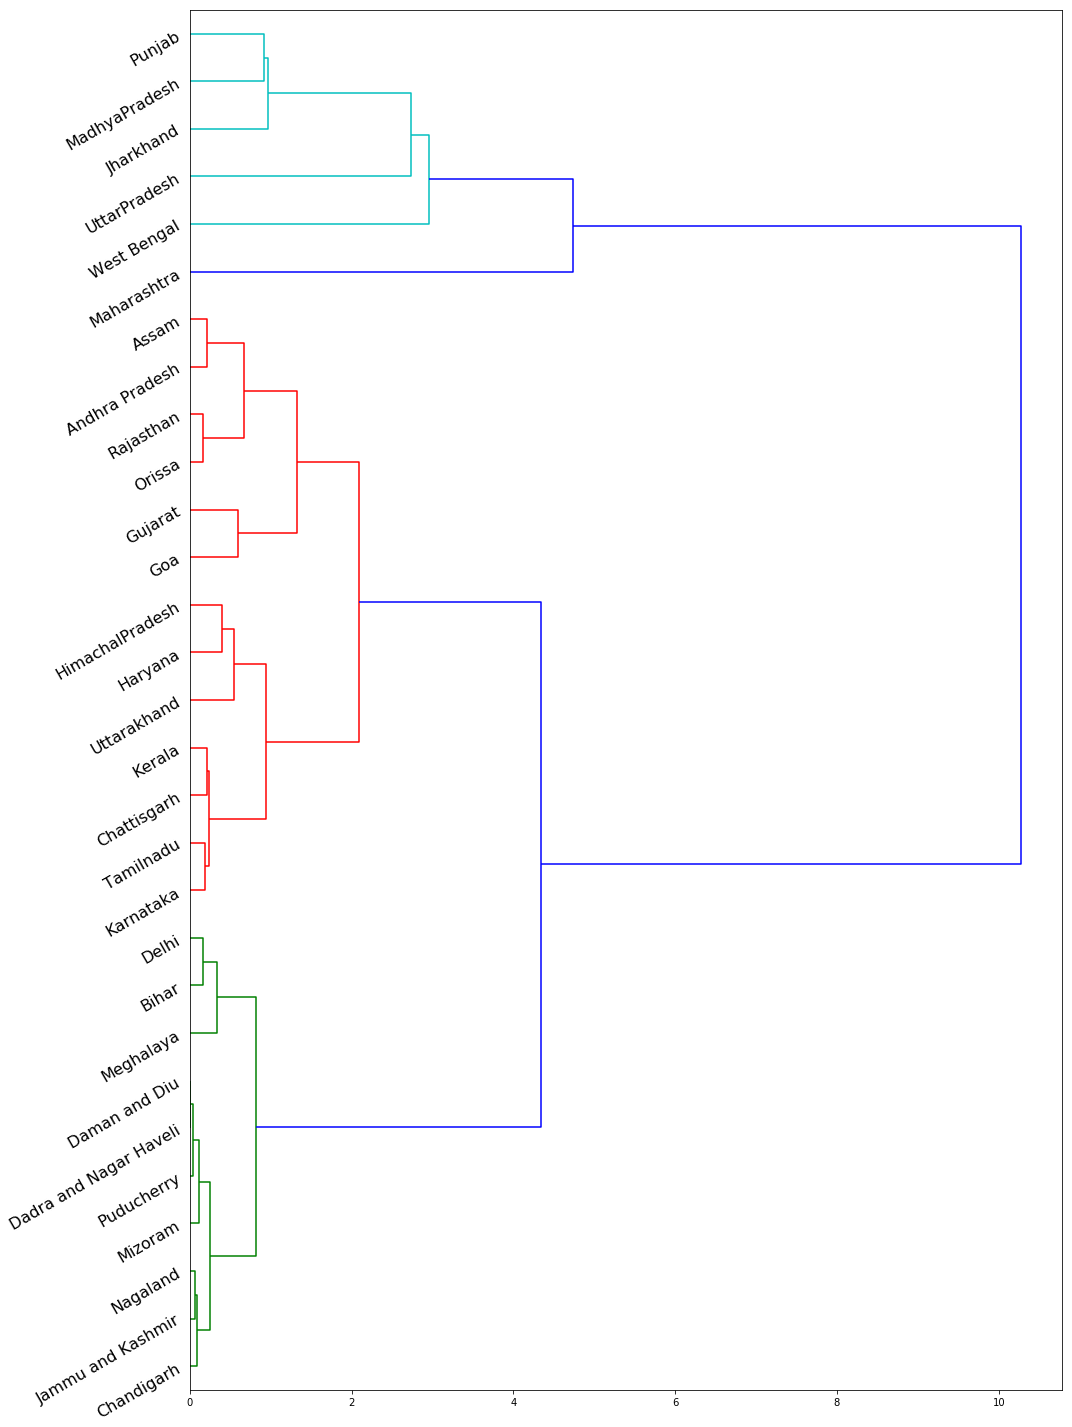

In [62]:
fig, ax=plt.subplots(figsize=(15,20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['State']),
              leaf_rotation=30,leaf_font_size=16,color_threshold=4)
plt.tight_layout()               
plt.show()